In [1]:
# Download necessary packages
library(ggplot2)
library(psych)
library(dplyr)
library(fmsb)
library(ggradar)
library(plotrix)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotrix’


The following object is masked from ‘package:psych’:

    rescale




In [2]:
# Extract patient data and patient ROI data
data <- read.csv("~/scratch//tractoflow_hcp_dwi/UKB_WM_Regionwise_Data_allAtlases_allMeasures.csv")
patient_data <- read.csv("~/scratch//tractoflow_hcp_dwi/UKBB_patient_data.csv")

In [107]:
# Subset data frame based on DTI measure
ad_all_data <- data[data$WM_Measure == 'AD', ]
fa_all_data <- data[data$WM_Measure == 'FA', ]
md_all_data <- data[data$WM_Measure == 'MD', ]
rd_all_data <- data[data$WM_Measure == 'RD', ]

In [108]:
# Find all unique values per DTI-based data frame
vec1 <- unique(ad_all_data$Subject_ID)
vec2 <- unique(fa_all_data$Subject_ID)
vec3 <- unique(md_all_data$Subject_ID)
vec4 <- unique(rd_all_data$Subject_ID)

# Find the values that are in vec1 but not in vec2
missing_in_df2 <- setdiff(vec1, vec2)

# Find the values that are in vec2 but not in vec1
missing_in_df1 <- setdiff(vec2, vec1)

# Find the values that are in vec3 but not in vec4
missing_in_df4 <- setdiff(vec3, vec4)

# Find the values that are in vec4 but not in vec3
missing_in_df3 <- setdiff(vec4, vec3)

# Combine the missing values from both directions
all_missing_values <- unique(c(missing_in_df1, missing_in_df2, missing_in_df3, missing_in_df4))

In [109]:
indices_to_remove_df1 <- which(fa_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df1
fa_all_data <- fa_all_data[-indices_to_remove_df1, ]

# Find the indices of rows to be removed in df2
indices_to_remove_df2 <- which(md_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df2
md_all_data <- md_all_data[-indices_to_remove_df2, ]

# Find the indices of rows to be removed in df3
indices_to_remove_df3 <- which(rd_all_data$Subject_ID %in% all_missing_values)

# Remove rows from df3
rd_all_data <- rd_all_data[-indices_to_remove_df3, ]

In [110]:
# Define variables with relevant ROIs
ad_data <- ad_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
fa_data <- fa_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
md_data <- md_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]
rd_data <- rd_all_data[c("Subject_ID", "WM_Measure", "left_caudate", "right_caudate", "left_putamen", "right_putamen", "left_nucleus_accumbens", "right_nucleus_accumbens", "left_hippocampus", "right_hippocampus", "left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")]

In [111]:
# Calculate average value for each ROI for AD data
ad_data$caudate <- rowMeans(ad_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
ad_data$putamen <- rowMeans(ad_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
ad_data$nacc <- rowMeans(ad_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
ad_data$hippocampus <- rowMeans(ad_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
ad_data$pallidum <- rowMeans(ad_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

# Calculate average value for each ROI for FA data
fa_data$caudate <- rowMeans(fa_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
fa_data$putamen <- rowMeans(fa_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
fa_data$nacc <- rowMeans(fa_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
fa_data$hippocampus <- rowMeans(fa_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
fa_data$pallidum <- rowMeans(fa_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

# Calculate average value for each ROI for MD data
md_data$caudate <- rowMeans(md_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
md_data$putamen <- rowMeans(md_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
md_data$nacc <- rowMeans(md_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
md_data$hippocampus <- rowMeans(md_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
md_data$pallidum <- rowMeans(md_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

# Calculate average value for each ROI for RD data
rd_data$caudate <- rowMeans(rd_data[c("left_caudate", "right_caudate")], na.rm = TRUE)
rd_data$putamen <- rowMeans(rd_data[c("left_putamen", "right_putamen")], na.rm = TRUE)
rd_data$nacc <- rowMeans(rd_data[c("left_nucleus_accumbens", "right_nucleus_accumbens")], na.rm = TRUE)
rd_data$hippocampus <- rowMeans(rd_data[c("left_hippocampus", "right_hippocampus")], na.rm = TRUE)
rd_data$pallidum <- rowMeans(rd_data[c("left_globus_pallidus_externa", "right_globus_pallidus_externa", "left_globus_pallidus_interna", "right_globus_pallidus_Interna")], na.rm = TRUE)

[1] 2.284904

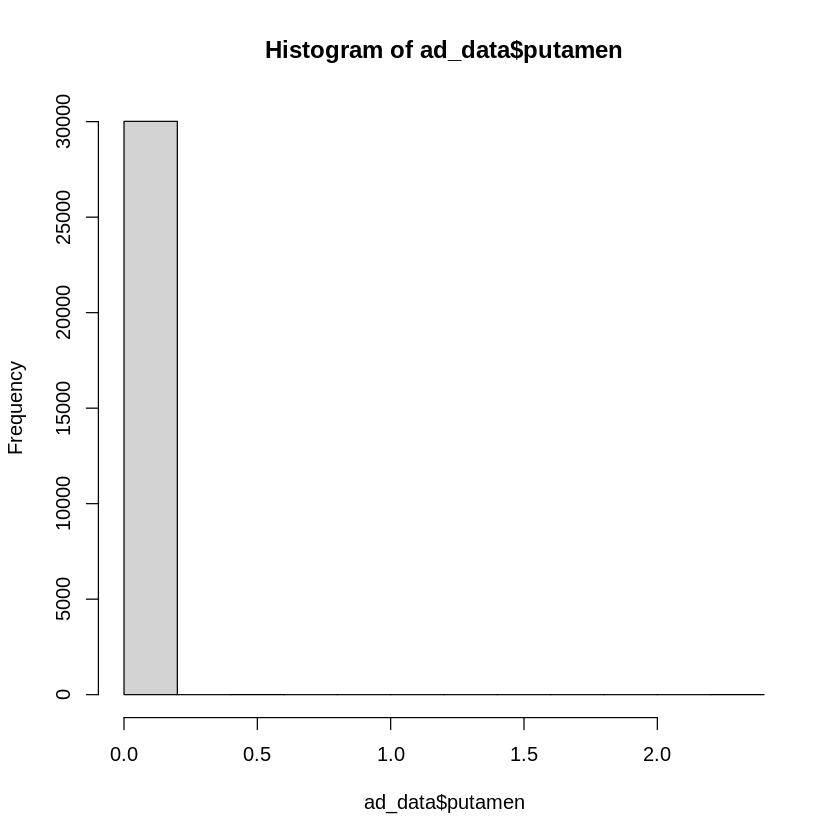

In [113]:
hist(ad_data$putamen)
max(ad_data$putamen)

In [114]:
# Remove outliers for AD data
Q3_c=as.numeric(quantile(ad_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(ad_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(ad_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(ad_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(ad_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(ad_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(ad_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(ad_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(ad_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(ad_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
ad_data$caudate[ad_data$caudate<lower_c]=NA
ad_data$caudate[ad_data$caudate>upper_c]=NA
ad_data$putamen[ad_data$putamen<lower_pu]=NA
ad_data$putamen[ad_data$putamen>upper_pu]=NA
ad_data$nacc[ad_data$nacc<lower_n]=NA
ad_data$nacc[ad_data$nacc>upper_n]=NA
ad_data$hippocampus[ad_data$hippocampus<lower_h]=NA
ad_data$hippocampus[ad_data$hippocampus>upper_h]=NA
ad_data$pallidum[ad_data$pallidum<lower_pa]=NA
ad_data$pallidum[ad_data$pallidum>upper_pa]=NA

# Remove outliers for FA data
Q3_c=as.numeric(quantile(fa_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(fa_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(fa_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(fa_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(fa_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(fa_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(fa_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(fa_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(fa_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(fa_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
fa_data$caudate[fa_data$caudate<lower_c]=NA
fa_data$caudate[fa_data$caudate>upper_c]=NA
fa_data$putamen[fa_data$putamen<lower_pu]=NA
fa_data$putamen[fa_data$putamen>upper_pu]=NA
fa_data$nacc[fa_data$nacc<lower_n]=NA
fa_data$nacc[fa_data$nacc>upper_n]=NA
fa_data$hippocampus[fa_data$hippocampus<lower_h]=NA
fa_data$hippocampus[fa_data$hippocampus>upper_h]=NA
fa_data$pallidum[fa_data$pallidum<lower_pa]=NA
fa_data$pallidum[fa_data$pallidum>upper_pa]=NA

# Remove outliers for MD data
Q3_c=as.numeric(quantile(md_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(md_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(md_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(md_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(md_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(md_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(md_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(md_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(md_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(md_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
md_data$caudate[md_data$caudate<lower_c]=NA
md_data$caudate[md_data$caudate>upper_c]=NA
md_data$putamen[md_data$putamen<lower_pu]=NA
md_data$putamen[md_data$putamen>upper_pu]=NA
md_data$nacc[md_data$nacc<lower_n]=NA
md_data$nacc[md_data$nacc>upper_n]=NA
md_data$hippocampus[md_data$hippocampus<lower_h]=NA
md_data$hippocampus[md_data$hippocampus>upper_h]=NA
md_data$pallidum[md_data$pallidum<lower_pa]=NA
md_data$pallidum[md_data$pallidum>upper_pa]=NA

# Remove outliers for RD data
Q3_c=as.numeric(quantile(rd_data$caudate,0.75, na.rm=TRUE))
Q1_c=as.numeric(quantile(rd_data$caudate,0.25, na.rm=TRUE))
upper_c=Q3_c+(2.2*(Q3_c-Q1_c))
lower_c=Q1_c-(2.2*(Q3_c-Q1_c))
Q3_pu=as.numeric(quantile(rd_data$putamen,0.75, na.rm=TRUE))
Q1_pu=as.numeric(quantile(rd_data$putamen,0.25, na.rm=TRUE))
upper_pu=Q3_pu+(2.2*(Q3_pu-Q1_pu))
lower_pu=Q1_pu-(2.2*(Q3_pu-Q1_pu))
Q3_n=as.numeric(quantile(rd_data$nacc,0.75, na.rm=TRUE))
Q1_n=as.numeric(quantile(rd_data$nacc,0.25, na.rm=TRUE))
upper_n=Q3_n+(2.2*(Q3_n-Q1_n))
lower_n=Q1_n-(2.2*(Q3_n-Q1_n))
Q3_h=as.numeric(quantile(rd_data$hippocampus,0.75, na.rm=TRUE))
Q1_h=as.numeric(quantile(rd_data$hippocampus,0.25, na.rm=TRUE))
upper_h=Q3_h+(2.2*(Q3_h-Q1_h))
lower_h=Q1_h-(2.2*(Q3_h-Q1_h))
Q3_pa=as.numeric(quantile(rd_data$pallidum,0.75, na.rm=TRUE))
Q1_pa=as.numeric(quantile(rd_data$pallidum,0.25, na.rm=TRUE))
upper_pa=Q3_pa+(2.2*(Q3_pa-Q1_pa))
lower_pa=Q1_pa-(2.2*(Q3_pa-Q1_pa))
rd_data$caudate[rd_data$caudate<lower_c]=NA
rd_data$caudate[rd_data$caudate>upper_c]=NA
rd_data$putamen[rd_data$putamen<lower_pu]=NA
rd_data$putamen[rd_data$putamen>upper_pu]=NA
rd_data$nacc[rd_data$nacc<lower_n]=NA
rd_data$nacc[rd_data$nacc>upper_n]=NA
rd_data$hippocampus[rd_data$hippocampus<lower_h]=NA
rd_data$hippocampus[rd_data$hippocampus>upper_h]=NA
rd_data$pallidum[rd_data$pallidum<lower_pa]=NA
rd_data$pallidum[rd_data$pallidum>upper_pa]=NA

[1] NA

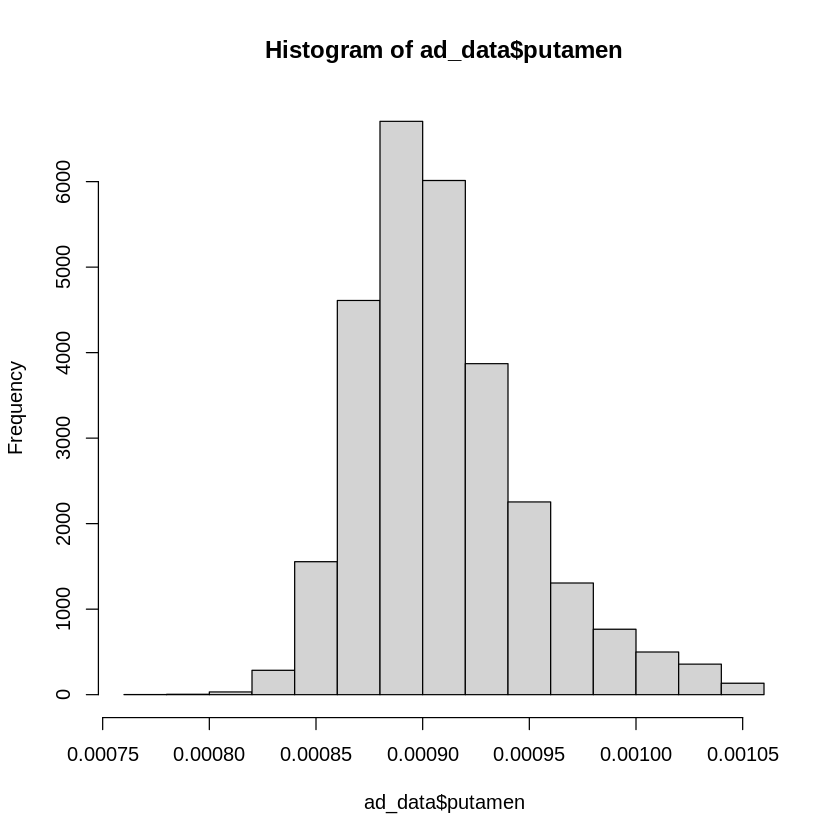

In [115]:
hist(ad_data$putamen)
max(ad_data$putamen)

In [116]:
# Rename column names to patient DTI data frames
colnames(patient_data)[colnames(patient_data) == "eid"] <- "Subject_ID"

In [117]:
# Merge DTI data frames with relevant patient variables
subj_data <- patient_data[c("Subject_ID", "sex_31.0.0", "age_when_attended_assessment_centre_21003.2.0", "volume_of_estimatedtotalintracranial_whole_brain_26521.2.0", "uk_biobank_assessment_centre_54.2.0", "mean_tfmri_head_motion_averaged_across_space_and_time_points_25742.2.0", "mean_rfmri_head_motion_averaged_across_space_and_time_points_25741.2.0", "date_of_attending_assessment_centre_53.2.0", "body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", "ldl_direct_30780.0.0", "triglycerides_30870.0.0", "systolic_blood_pressure_automated_reading_4080.0.1", "diastolic_blood_pressure_automated_reading_4079.0.1")]
ad_subj_data=merge(subj_data, ad_data)
fa_subj_data=merge(subj_data, fa_data)
md_subj_data=merge(subj_data, md_data)
rd_subj_data=merge(subj_data, rd_data)

In [118]:
# Extract previously calculated hypothalamus data from scatter_plots_UKBB.ipynb
hypo_ad <- read.csv("~/linear_regression/UKBB_ad_data.csv")
hypo_fa <- read.csv("~/linear_regression/UKBB_fa_data.csv")
hypo_md <- read.csv("~/linear_regression/UKBB_md_data.csv")
hypo_rd <- read.csv("~/linear_regression/UKBB_rd_data.csv")

In [119]:
indices_to_remove_df1 <- which(hypo_fa$Subject_ID %in% all_missing_values)

# Remove rows from df1
hypo_fa <- hypo_fa[-indices_to_remove_df1, ]

# Find the indices of rows to be removed in df2
indices_to_remove_df2 <- which(hypo_md$Subject_ID %in% all_missing_values)

# Remove rows from df2
hypo_md <- hypo_md[-indices_to_remove_df2, ]

# Find the indices of rows to be removed in df3
indices_to_remove_df3 <- which(hypo_rd$Subject_ID %in% all_missing_values)

# Remove rows from df3
hypo_rd <- hypo_rd[-indices_to_remove_df3, ]

In [120]:
# Add hypothalamic values to subject data frames
ad_subj_data$full_hypo <- hypo_ad$full_hypo
fa_subj_data$full_hypo <- hypo_fa$full_hypo
md_subj_data$full_hypo <- hypo_md$full_hypo
rd_subj_data$full_hypo <- hypo_rd$full_hypo

In [121]:
# Remove outliers for hypothalamic AD data
Q3=as.numeric(quantile(ad_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(ad_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
ad_subj_data$full_hypo[ad_subj_data$full_hypo<lower]=NA
ad_subj_data$full_hypo[ad_subj_data$full_hypo>upper]=NA

# Remove outliers for hypothalamic Fa data
Q3=as.numeric(quantile(fa_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(fa_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
fa_subj_data$full_hypo[fa_subj_data$full_hypo<lower]=NA
fa_subj_data$full_hypo[fa_subj_data$full_hypo>upper]=NA

# Remove outliers for hypothalamic MD data
Q3=as.numeric(quantile(md_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(md_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
md_subj_data$full_hypo[md_subj_data$full_hypo<lower]=NA
md_subj_data$full_hypo[md_subj_data$full_hypo>upper]=NA

# Remove outliers for hypothalamic RD data
Q3=as.numeric(quantile(rd_subj_data$full_hypo,0.75, na.rm=TRUE))
Q1=as.numeric(quantile(rd_subj_data$full_hypo,0.25, na.rm=TRUE))
upper=Q3+(2.2*(Q3-Q1))
lower=Q1-(2.2*(Q3-Q1))
rd_subj_data$full_hypo[rd_subj_data$full_hypo<lower]=NA
rd_subj_data$full_hypo[rd_subj_data$full_hypo>upper]=NA

In [122]:
# Write CSV files for DTI data frames
write.csv(ad_subj_data, "~/linear_regression/UKBB_ad_data_other.csv")
write.csv(fa_subj_data, "~/linear_regression/UKBB_fa_data_other.csv")
write.csv(md_subj_data, "~/linear_regression/UKBB_md_data_other.csv")
write.csv(rd_subj_data, "~/linear_regression/UKBB_rd_data_other.csv")

In [123]:
# It takes a while to load UKB_WM_Regionwise_Data_allAtlases_allMeasures.csv,
# so if the code needs to edited you can start from here by redefining the
# variables from the prewritten CSV files
ad_subj_data <- read.csv("~/linear_regression/UKBB_ad_data_other.csv")
fa_subj_data <- read.csv("~/linear_regression/UKBB_fa_data_other.csv")
md_subj_data <- read.csv("~/linear_regression/UKBB_md_data_other.csv")
rd_subj_data <- read.csv("~/linear_regression/UKBB_rd_data_other.csv")

In [124]:
# Define necessary variables
subject_data <- list(ad_subj_data, fa_subj_data, md_subj_data, rd_subj_data)
subject_datasets <- c("ad", "fa", "md", "rd")
brain_regions <- c("caudate", "putamen", "nacc", "hippocampus", "pallidum", "full_hypo")
vars <- c("BMI", "CRP", "Glucose", "HBA1C", "Cholesterol", "HDL_Chol", "LDL_Chol", "Triglycerides", "Systolic_BP", "Diastolic_BP")
variables <- c("body_mass_index_bmi_21001.2.0", "c.reactive_protein_30710.0.0", 
                        "glucose_30740.0.0", "glycated_haemoglobin_hba1c_30750.0.0", 
                        "cholesterol_30690.0.0", "hdl_cholesterol_30760.0.0", 
                        "ldl_direct_30780.0.0", "triglycerides_30870.0.0", 
                        "systolic_blood_pressure_automated_reading_4080.0.1", 
                        "diastolic_blood_pressure_automated_reading_4079.0.1")
all_data_summary <- data.frame()

In [125]:
# Loop through the DTI measure data frames
for (i in seq_along(subject_data)) {
    current_data <- subject_data[[i]]
    j=1
    # Loop through each brain region
    for (region in brain_regions) {
        k=1
        # Loop through each obesity-related parameter
        for (variable in variables) {
            # Calculate regression for current region, parameter, and data frame
            lm_model <- lm(get(region) ~ get(variable) + 
                           age_when_attended_assessment_centre_21003.2.0 + 
                           poly(age_when_attended_assessment_centre_21003.2.0, 2, raw=TRUE) * sex_31.0.0 +
                           poly(difftime(as.Date(date_of_attending_assessment_centre_53.2.0),
                                min(as.Date(date_of_attending_assessment_centre_53.2.0)), units='days'), 2, raw=TRUE) + 
                           uk_biobank_assessment_centre_54.2.0 + 
                           volume_of_estimatedtotalintracranial_whole_brain_26521.2.0, data = current_data)
            summary_model <- summary(lm_model)
            values <- data.frame(summary_model$coefficients[2,])
            values <- as.data.frame(t(values))
            # Create necessary columns to make the data frame more readable
            values$metric <- subject_datasets[i]
            values$region <- region
            values$measure <- vars[k]
            # Rename row names to relevant patient information
            row_name <- paste(subject_datasets[i],"_", region, "_", variable)
            rownames(values) <- row_name 
            all_data_summary <- rbind(all_data_summary, values)
            k=k+1
        j=j+1
        }
    }
}


In [127]:
# Write CSV file for summarized UKBB data
write.csv(all_data_summary, "~/linear_regression/UKBB_all_data_summary.csv")